## Import Libraries

In [47]:
import sqlite3
import pandas as pd
import numpy as np

## Read the dataset

In [ ]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

## Statistics: Let us look how the data looks

In [141]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [142]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,180354.0,91995.886274,53092.657914,1.0,46074.25,92003.5,137935.75,183978.0
player_fifa_api_id,180354.0,166822.125803,52821.443279,2.0,156616.00,183792.0,200138.00,234141.0
player_api_id,180354.0,137653.145514,137599.735284,2625.0,35451.00,80291.0,192841.00,750584.0
overall_rating,180354.0,68.635317,7.027950,33.0,64.00,69.0,73.00,94.0
potential,180354.0,73.479457,6.581963,39.0,69.00,74.0,78.00,97.0
crossing,180354.0,55.142071,17.247231,1.0,45.00,59.0,68.00,95.0
finishing,180354.0,49.962136,19.041760,1.0,34.00,53.0,65.00,97.0
heading_accuracy,180354.0,57.263476,16.478716,1.0,49.00,60.0,68.00,98.0
short_passing,180354.0,62.486726,14.172493,3.0,57.00,65.0,72.00,97.0
volleys,180354.0,49.488927,18.252319,1.0,35.00,52.0,64.00,93.0


## Data Cleaning: Handling Missing Data

In [49]:
#is any row NULL ?

rows = df.shape[0]
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [50]:
# Fix it

df = df.dropna()

In [51]:
#Check if all NULLS are gone ?

df.isnull().any().any(), df.shape

(False, (180354, 42))

In [52]:
#How many rows with NULL values?

rows - df.shape[0]

3624

In [54]:
#Shuffle the rows of df

df = df.reindex(np.random.permutation(df.index))

# Predicting: 'overall_rating' of a player

### Take a look at top few rows

In [143]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
71168,71169,169934,40959,2015-09-21 00:00:00,73.0,75.0,right,medium,medium,13.0,...,48.0,17.0,11.0,17.0,17.0,76.0,68.0,72.0,70.0,76.0
61750,61751,53593,24393,2013-07-12 00:00:00,67.0,67.0,right,high,medium,65.0,...,67.0,63.0,53.0,59.0,55.0,11.0,7.0,14.0,7.0,13.0
45501,45502,231416,688876,2015-12-10 00:00:00,62.0,76.0,right,medium,low,66.0,...,57.0,45.0,22.0,31.0,33.0,9.0,7.0,14.0,11.0,12.0
120280,120281,206058,288613,2013-03-28 00:00:00,77.0,85.0,right,medium,medium,78.0,...,62.0,48.0,77.0,77.0,76.0,10.0,14.0,14.0,7.0,13.0
67369,67370,173228,40139,2016-02-04 00:00:00,78.0,78.0,left,high,medium,83.0,...,62.0,82.0,72.0,74.0,78.0,7.0,9.0,8.0,9.0,13.0


In [136]:
# Let us plot first few lines (ignore the first column - it is the index)

df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
71168,17.0,73.0
61750,63.0,67.0
45501,45.0,62.0
120280,48.0,77.0
67369,82.0,78.0
114239,64.0,65.0
84657,35.0,81.0
22531,54.0,62.0
55920,74.0,72.0
164033,63.0,65.0


## Check if 'penalties' is correlated to 'overall_rating'

In [58]:
# are these correlated ?

df['overall_rating'].corr(df['penalties'])

0.39271510791118808

## Create a list of potentialFeatures that you want to measure correlation with

In [66]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [67]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print(related)


0.243998488371
0.357565769109
0.349800311442
0.443990762826
0.428053132222
0.325605657787


### Notice: ball_control and shot_power seem to have higher correlation with ratings


# Data Visualization: 

In [71]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [102]:
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [105]:
len(cols), len(correlations)

(34, 34)

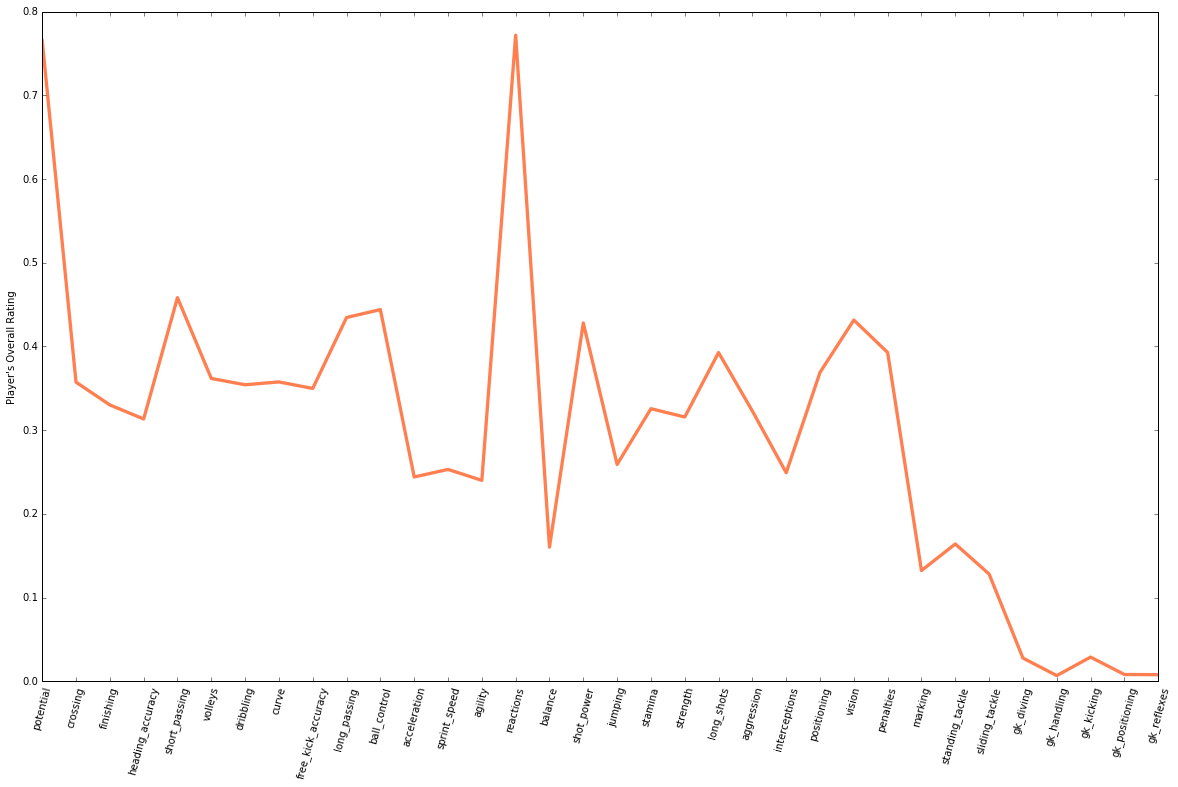

In [146]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

color='coral'
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 12)
plt.ylabel('Player\'s Overall Rating')

ax = df2.correlation.plot(linewidth=3.3, color=color)
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)

## Can you name the top five characteristics of a player that can tell you something about their overall rating